<a href="https://colab.research.google.com/github/patlewig/aim/blob/master/notebooks/fingerprint_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

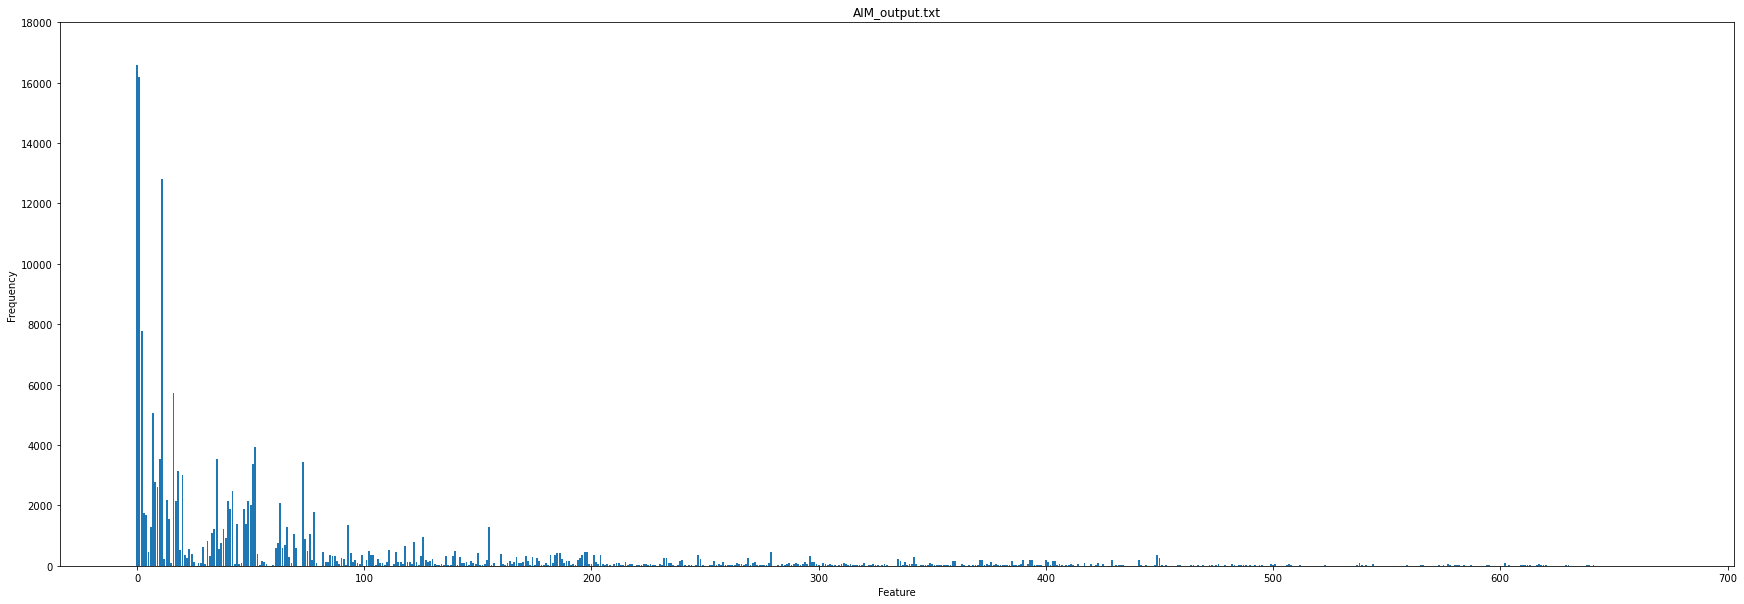

In [1]:
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt

def plot_features(file_name):

  df = pd.read_csv(file_name, sep=';')
  df['Feature_list'] = df.apply(lambda x: x.index[x == 1].tolist(), axis=1)
  df = df[['M_NAME', 'Feature_list']]
  
  Features = []
  for row in df["Feature_list"]:
    for fragment in row:
      Features.append(fragment)

  counter = collections.Counter(Features)
  keys = counter.keys()
  key_len = np.arange(len(keys))
  values = counter.values()

  plt.figure(figsize=(30, 10))  
  plt.bar(key_len,values)
  plt.ylabel('Frequency')
  plt.xlabel('Feature')
  plt.ylim(top=18000)
  plt.title(file_name)
  plt.show()
  #return df

plot_features('AIM_output.txt')





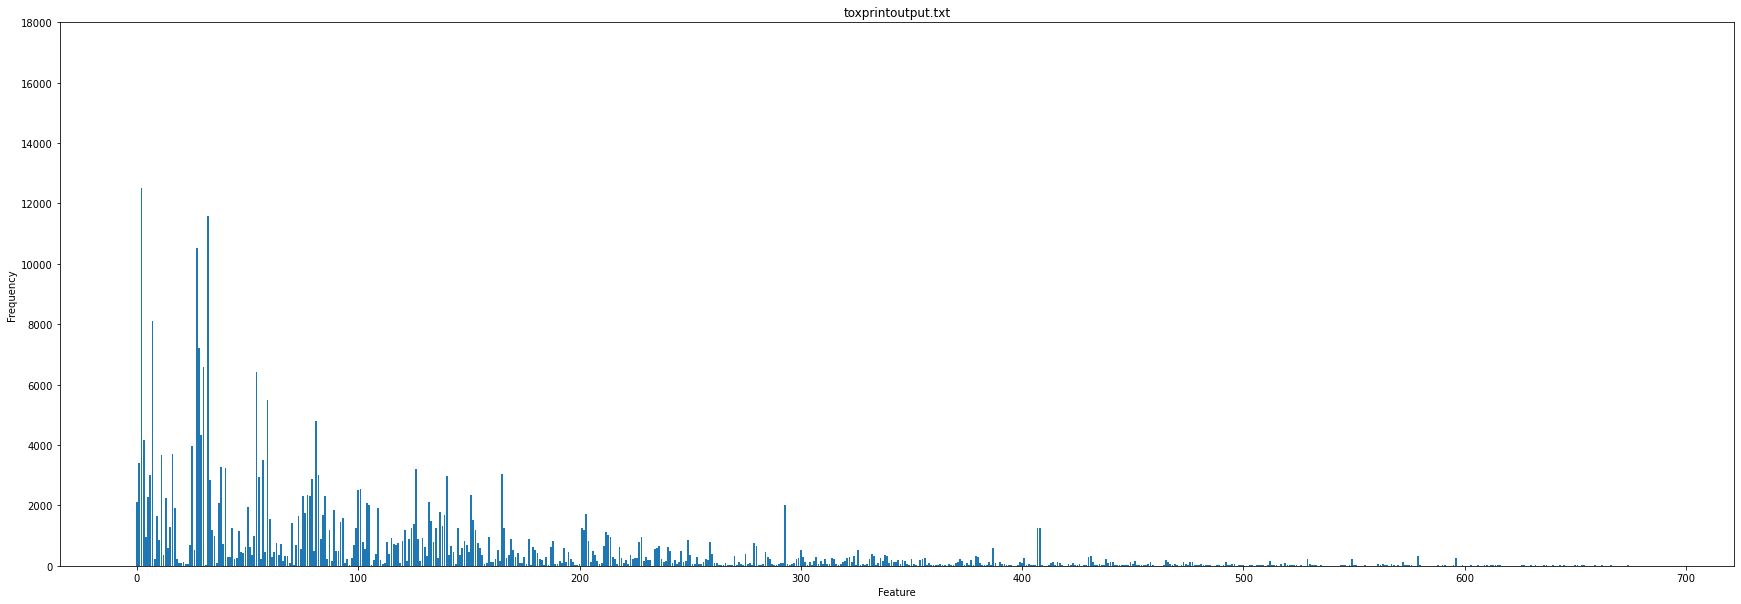

In [2]:
plot_features('toxprintoutput.txt')
#crosstab

In [3]:
df_aim = pd.read_csv('AIM_output.txt', sep=';')
df_toxprints = pd.read_csv('toxprintoutput.txt', sep=';')

#crosstab = pd.crosstab(df_AIM,df_toxprints)


In [8]:
#print(df_aim.iloc[:,:10].head(10))
#print(df_toxprints.iloc[:,:10].head(10))
#df_toxprints.iloc[:,1]


df_0 = df_aim.iloc[:,1:-2]
df_1 = df_toxprints.iloc[:,1:-2]
df_2 = pd.DataFrame(columns = [df_0.columns], index=[df_1.columns])
#df_2 = num_col df_1 x num_col df_0


for i, col in enumerate(df_0):
    a = []
    for j, col in enumerate(df_1):
        df_cross = pd.crosstab(df_0.iloc[:,i],df_1.iloc[:,j], dropna=False)[::-1]
    
        if df_cross.shape[1] == 1:
            df_cross['1'] = 0

        df_cross = df_cross[df_cross.columns[::-1]]
        df_cross = df_cross.transpose()

        if df_cross.shape[1] == 1:
            df_cross.insert(0,'1',0)
            
        a.append(df_cross.to_numpy())
  
    df_2.iloc[:,i] = a


df_2




,CH3 [aliphatic carbon],CH2 [aliphatic carbon],CH [aliphatic carbon],"C [aliphatic carbon No H, not tert]","C [aliphatic carbon No H, not tert].1","C [aliphatic carbon No H, not tert].2",=CH2 [olefinic carbon],=CH or =C [olefinc carbon],#C [acetylenic carbon],"OH [hydroxy, aliphatic attach]",...,N CH=N OH [oxime type] correction,Ring rx: OH ortho to C=N N carbon,=C (C#N) C#N [dicyano] correction,Aromatic nitrogen C C(=S) N struct corr.,Cyclic ketoxime(>C=N OH) [1 olefin attach],C=N O sulfur(aliphatic) [iminoxy] correc,S N( C(=O) C) C(=O) C struct correction,Sulfur(+4) charged halide type,Ring rx: S=P(O)(O)O / 5 mem (2 nitrogen),O=P( O)( O) C OH correction
atom:element_main_group,"[[0, 274], [16570, 9231]]","[[0, 274], [16188, 9613]]","[[0, 274], [7787, 18014]]","[[0, 274], [1273, 24528]]","[[0, 274], [1210, 24591]]","[[0, 274], [0, 25801]]","[[0, 274], [1336, 24465]]","[[0, 274], [5065, 20736]]","[[1, 273], [217, 25584]]","[[0, 274], [3530, 22271]]",...,"[[0, 274], [14, 25787]]","[[0, 274], [3, 25798]]","[[0, 274], [18, 25783]]","[[0, 274], [0, 25801]]","[[0, 274], [2, 25799]]","[[0, 274], [8, 25793]]","[[0, 274], [3, 25798]]","[[0, 274], [0, 25801]]","[[0, 274], [2, 25799]]","[[0, 274], [2, 25799]]"
atom:element_metal_group_I_II,"[[1225, 1718], [15345, 7787]]","[[1078, 1865], [15110, 8022]]","[[500, 2443], [7287, 15845]]","[[86, 2857], [1187, 21945]]","[[184, 2759], [1026, 22106]]","[[0, 2943], [0, 23132]]","[[63, 2880], [1273, 21859]]","[[342, 2601], [4723, 18409]]","[[6, 2937], [212, 22920]]","[[217, 2726], [3313, 19819]]",...,"[[1, 2942], [13, 23119]]","[[0, 2943], [3, 23129]]","[[0, 2943], [18, 23114]]","[[0, 2943], [0, 23132]]","[[0, 2943], [2, 23130]]","[[1, 2942], [7, 23125]]","[[0, 2943], [3, 23129]]","[[0, 2943], [0, 23132]]","[[0, 2943], [2, 23130]]","[[0, 2943], [2, 23130]]"
atom:element_metal_group_III,"[[24, 210], [16546, 9295]]","[[10, 224], [16178, 9663]]","[[6, 228], [7781, 18060]]","[[4, 230], [1269, 24572]]","[[0, 234], [1210, 24631]]","[[0, 234], [0, 25841]]","[[0, 234], [1336, 24505]]","[[3, 231], [5062, 20779]]","[[0, 234], [218, 25623]]","[[2, 232], [3528, 22313]]",...,"[[0, 234], [14, 25827]]","[[0, 234], [3, 25838]]","[[0, 234], [18, 25823]]","[[0, 234], [0, 25841]]","[[0, 234], [2, 25839]]","[[0, 234], [8, 25833]]","[[0, 234], [3, 25838]]","[[0, 234], [0, 25841]]","[[0, 234], [2, 25839]]","[[0, 234], [2, 25839]]"
atom:element_metal_metalloid,"[[774, 493], [15796, 9012]]","[[597, 670], [15591, 9217]]","[[127, 1140], [7660, 17148]]","[[21, 1246], [1252, 23556]]","[[17, 1250], [1193, 23615]]","[[0, 1267], [0, 24808]]","[[92, 1175], [1244, 23564]]","[[121, 1146], [4944, 19864]]","[[6, 1261], [212, 24596]]","[[44, 1223], [3486, 21322]]",...,"[[1, 1266], [13, 24795]]","[[0, 1267], [3, 24805]]","[[0, 1267], [18, 24790]]","[[0, 1267], [0, 24808]]","[[0, 1267], [2, 24806]]","[[0, 1267], [8, 24800]]","[[0, 1267], [3, 24805]]","[[0, 1267], [0, 24808]]","[[0, 1267], [2, 24806]]","[[0, 1267], [2, 24806]]"
atom:element_metal_poor_metal,"[[218, 309], [16352, 9196]]","[[188, 339], [16000, 9548]]","[[57, 470], [7730, 17818]]","[[1, 526], [1272, 24276]]","[[5, 522], [1205, 24343]]","[[0, 527], [0, 25548]]","[[5, 522], [1331, 24217]]","[[39, 488], [5026, 20522]]","[[0, 527], [218, 25330]]","[[14, 513], [3516, 22032]]",...,"[[0, 527], [14, 25534]]","[[0, 527], [3, 25545]]","[[0, 527], [18, 25530]]","[[0, 527], [0, 25548]]","[[0, 527], [2, 25546]]","[[0, 527], [8, 25540]]","[[0, 527], [3, 25545]]","[[0, 527], [0, 25548]]","[[0, 527], [2, 25546]]","[[0, 527], [2, 25546]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,"[[0, 0], [16570, 9505]]","[[0, 0], [16188, 9887]]","[[0, 0], [7787, 18288]]","[[0, 0], [1273, 24802]]","[[0, 0], [1210, 24865]]","[[0, 0], [0, 26075]]","[[0, 0], [1336, 24739]]","[[0, 0], [5065, 21010]]","[[0, 0], [218, 25857]]","[[0, 0], [3530, 22545]]",...,"[[0, 0], [14, 26061]]","[[0, 0], [3, 26072]]","[[0, 0]

In [9]:
df_2.to_csv('compare.csv')

In [108]:
df_3 = df_2.iloc[:,90]

df_3 = df_3.apply(lambda x: np.reshape(x,(4,)))
                
df_3.sort_values(ascending=False, key= lambda col: col.map(lambda x: x[0]))
# list format: [TT,TF,FT,FF] -- x[2] = FT, can sort by specific element in list



bond:C#N_nitrile_generic                       [35, 698, 0, 25342]
bond:N=C=O_isocyanate_thio                      [21, 0, 14, 26040]
bond:CS_sulfide                              [21, 1255, 14, 24785]
bond:CS_sulfide_dialkyl                       [19, 582, 16, 25458]
chain:alkaneLinear_ethyl_C2(H_gt_1)         [11, 10521, 24, 15519]
                                                     ...          
bond:S(=O)N_sulfonamide                        [0, 547, 35, 25493]
bond:S(=O)N_sulfonylamide                      [0, 600, 35, 25440]
bond:S(=O)O_sulfonate                         [0, 1767, 35, 24273]
bond:S(=O)O_sulfonicAcid_acyclic_(chain)       [0, 366, 35, 25674]
ring:polycycle_tricyclo_benzvalene               [0, 0, 35, 26040]
Name: (C#N S [cyano, sulfur attach],), Length: 729, dtype: object